In [1]:
import os
import string
import numpy as np
from scipy.interpolate import interp1d
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
path='/DataDisk/datafiles/PGCC_HST/x1d_files/'

In [2]:
grating='E140H'
c=float('3e5')
c_lines=[1280.1353,1328.833,1656.9283]
cl_lines=[1347.2396]
co_lines=[1544.448,1509.748,1477.565,1447.352,1419.044,1392.525,1367.623,1344.186,1322.15,1301.403,1281.866,1263.433,1246.059]
sightlines=[x for x in os.listdir(path) if (os.path.isdir(path+x+'/E140H') and x.startswith('.')==False)]
al=string.maketrans('','')
nodigs=al.translate(al,string.digits)
sightlines.sort(key=lambda x: (len(x), int(x.translate(al,nodigs))))
#sightlines.sort(key=lambda x: len([path+x+'/E140H/'+y for y in os.listdir(path+x+'/E140H') if y.endswith('.fits')]))

In [3]:
test_line=1347.2396
results=[]
for sightline in sightlines:
    sightline_results=[]
    x1ds=[path+sightline+'/'+grating+'/'+x for x in os.listdir(path+sightline+'/E140H') if x.endswith('.fits')]
    for x1d in x1ds:
        x1d_results=[]
        hdulist=fits.open(x1d)
        for i in range(1,len(hdulist)):
            exptime=hdulist[i].header['exptime']
            scidata=hdulist[i].data
            for j in range(len(scidata)):
                if scidata[j]['wavelength'][0] < test_line < scidata[j]['wavelength'][-1]:
                    x1d_results.append((i,j,exptime))
        if len(x1d_results)>0:
            sightline_results.append((x1d.split('/')[-1].split('_')[0],x1d_results))
        #print
    if len(sightline_results) > 0:
        results.append((sightline,sightline_results)) 

(array([   0,    1,    2, ..., 1001, 1002, 1003]),)
1346.42495573 1352.38650088
1346.42495573 1352.38650088


(array([ 723,  724,  725,  726,  727,  728,  729,  730,  731,  732,  733,
        734,  735,  736,  737,  738,  739,  740,  741,  742,  743,  744,
        745,  746,  747,  748,  749,  750,  751,  752,  753,  754,  755,
        756,  757,  758,  759,  760,  761,  762,  763,  764,  765,  766,
        767,  768,  769,  770,  771,  772,  773,  774,  775,  776,  777,
        778,  779,  780,  781,  782,  783,  784,  785,  786,  787,  788,
        789,  790,  791,  792,  793,  794,  795,  796,  797,  798,  799,
        800,  801,  802,  803,  804,  805,  806,  807,  808,  809,  810,
        811,  812,  813,  814,  815,  816,  817,  818,  819,  820,  821,
        822,  823,  824,  825,  826,  827,  828,  829,  830,  831,  832,
        833,  834,  835,  836,  837,  838,  839,  840,  841,  842,  843,
        844,  845,  846,  847,  848,  849,  850,  851,  852,  853,  854,
        855, 

IndexError: index 705 is out of bounds for axis 1 with size 281

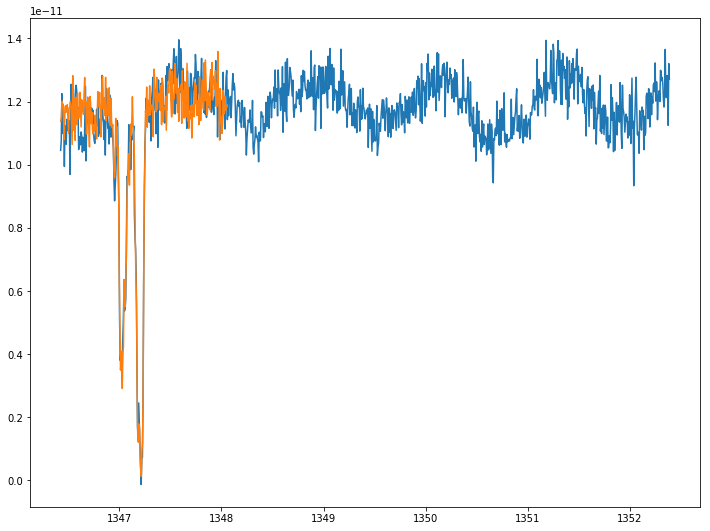

In [9]:
fig=plt.figure(1,figsize=(12,9))
subplt=plt.subplot(111)
for result in results[0:1]:
    sightline=result[0]
    filepath=path+sightline+'/'+grating+'/'
    specs=result[1]
    total_exp_time=sum([sum([y[2] for y in x[1]]) for x in specs])
    #Grab a wavelength array to use as a base grid to interpolate everything else on to.
    base_grid=fits.open(filepath+specs[0][0]+'_x1d.fits')[specs[0][1][0][0]].data[specs[0][1][0][1]]['wavelength'][10:-10]
    tot_flx=np.zeros(len(base_grid),dtype=float)
    for spec in specs:
        dataset=spec[0]
        hdulist=fits.open(filepath+dataset+'_x1d.fits')
        for onedspec in spec[1]:
            weight=onedspec[2]/total_exp_time
            wav=hdulist[onedspec[0]].data[onedspec[1]]['wavelength'][10:-10]
            flx=hdulist[onedspec[0]].data[onedspec[1]]['flux'][10:-10]
            idxs=np.where(np.logical_and(wav>=base_grid[0], wav<=base_grid[-1]))
            base_grid=base_grid[idxs]
            print idxs
            print wav[0],wav[-1]
            print base_grid[0],base_grid[-1]
            print
            print
            #f=interp1d(wav,flx,kind='cubic')
            #new_flux=f(base_grid)
            
            subplt.plot(wav[idxs],flx[idxs])